In [1]:
print('huilo tvoyou mattt Edu')
from jupyterthemes import jtplot
#jtplot.style()

huilo tvoyou mattt Edu


In [2]:
import pandas as pd
import numpy as np
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#AT FERST FOR PERGANT 
pergant_data1 = pd.read_csv('C://Users//secr_de//OneDrive//Рабочий стол//работа//Maternal Health Risk Data Set.csv')

In [4]:
#INFO & HEAD
pergant_data1.info()
pergant_data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
#STATISTIC
pergant_data1.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
pergant_data1 = pergant_data1.loc[pergant_data1['Age'] > 15]
pergant_data1 = pergant_data1.loc[pergant_data1['Age'] < 50]
pergant_data1.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,27.709974,114.125984,77.093176,8.429318,98.693438,74.862205
std,8.794254,17.331047,13.100159,2.945215,1.394219,8.303106
min,16.000000,70.000000,50.000000,6.000000,98.000000,7.000000
25%,21.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,32.000000,120.000000,90.000000,7.900000,98.000000,80.000000
max,49.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
pergant_data = pergant_data1
pergant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          762 non-null    int64  
 1   SystolicBP   762 non-null    int64  
 2   DiastolicBP  762 non-null    int64  
 3   BS           762 non-null    float64
 4   BodyTemp     762 non-null    float64
 5   HeartRate    762 non-null    int64  
 6   RiskLevel    762 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 47.6+ KB


Saving figure attribute_histogram_plots


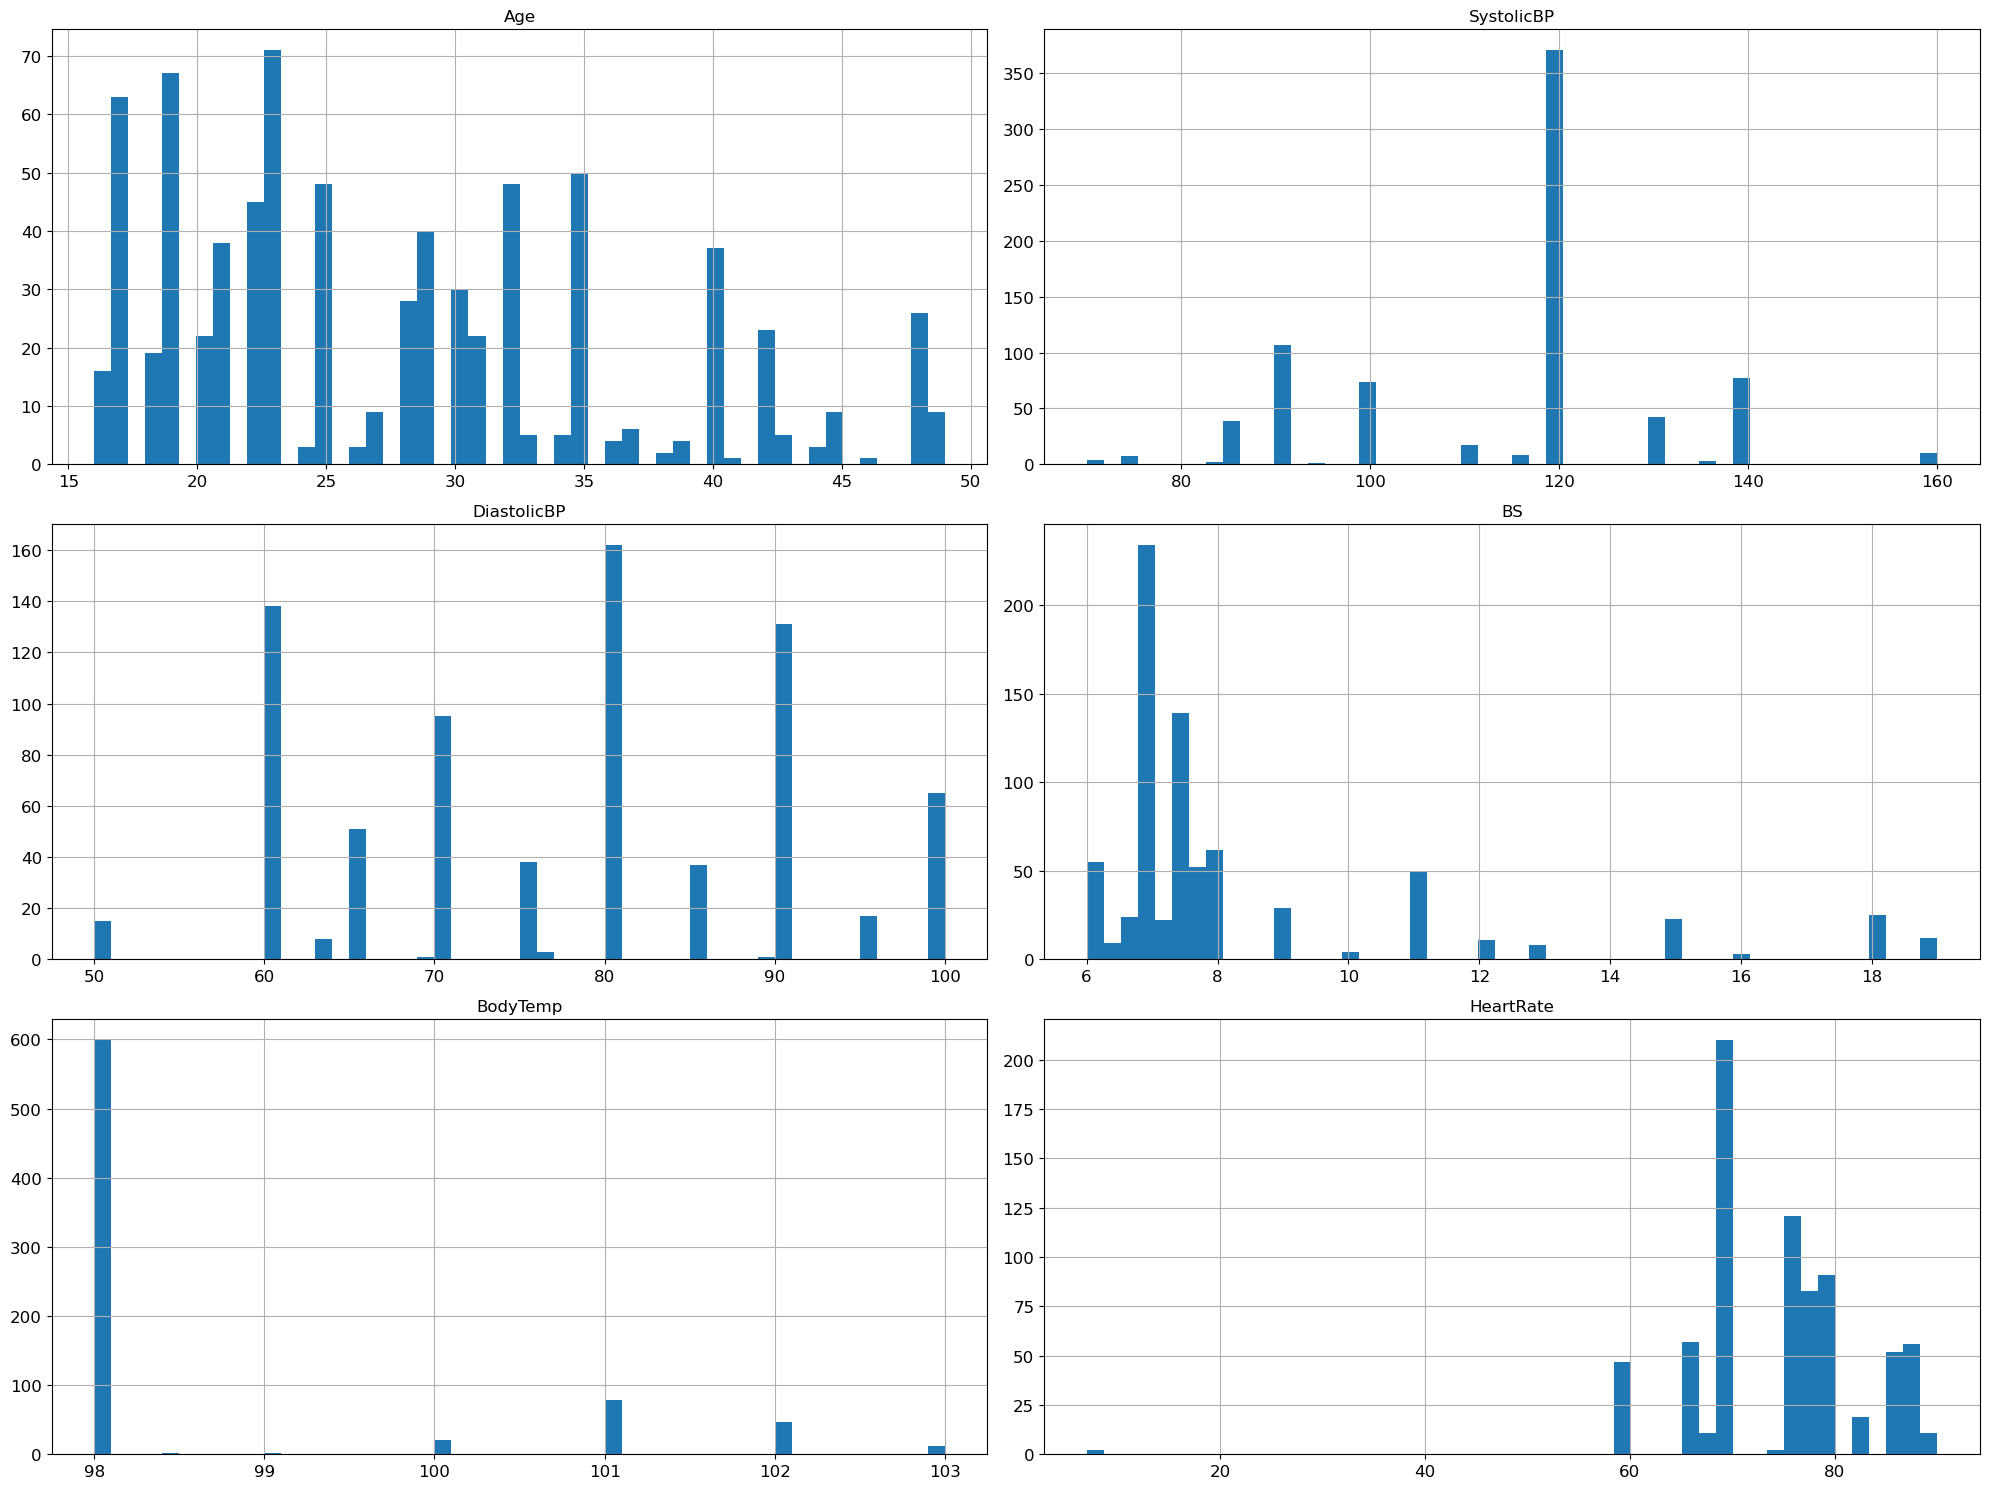

In [8]:
#HISTOGRAMM
%matplotlib inline
import matplotlib.pyplot as plt
pergant_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure scatter_matrix_plot


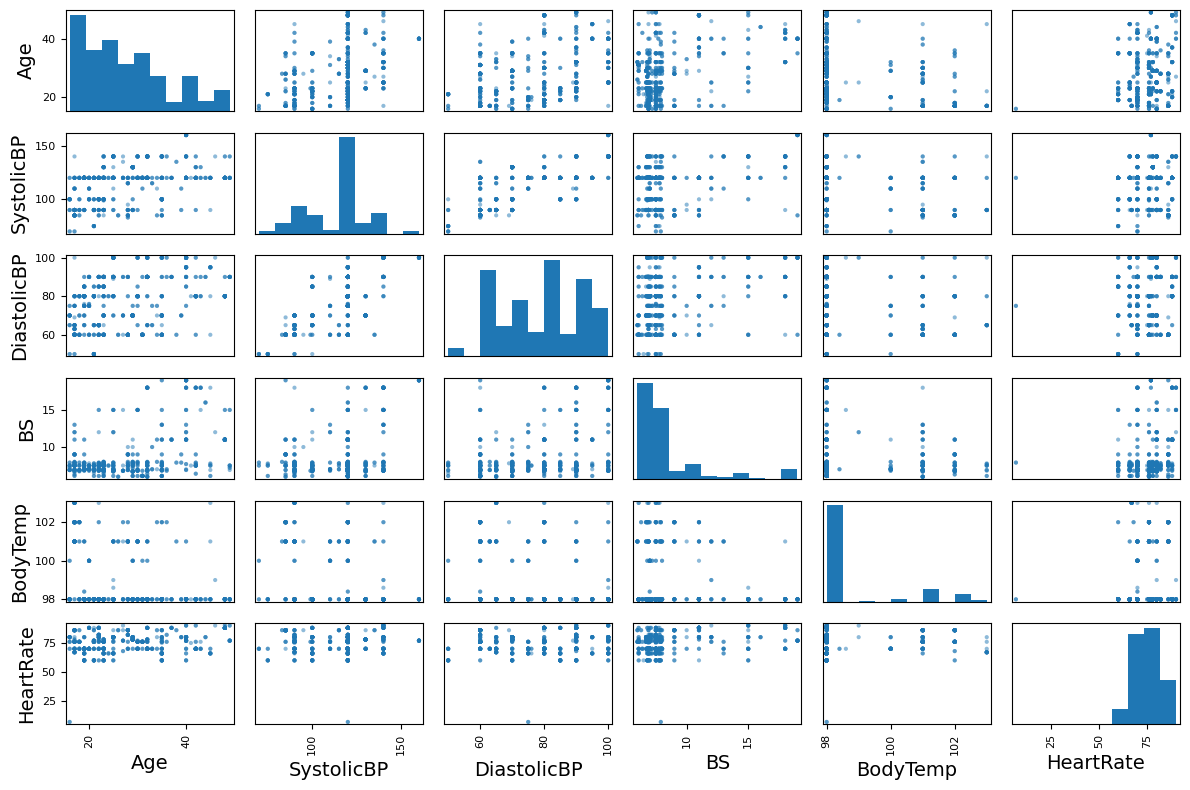

In [9]:
#SCATTER

# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = [ 'Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']
scatter_matrix(pergant_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")


In [10]:
#CORRELATION
corr_matrix = pergant_data.corr()
corr_matrix["BS"].sort_values(ascending=False)

BS             1.000000
Age            0.441561
SystolicBP     0.334771
DiastolicBP    0.313793
HeartRate      0.248576
BodyTemp      -0.070362
Name: BS, dtype: float64

In [11]:
#column ['Risklevel'] to CATEGORAL
aim_pergant = pergant_data['RiskLevel']
aim_pergant1=np.array(aim_pergant)
aim_pergant2=aim_pergant1.reshape(-1,1)


In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
aim_pergant_cat_encoded = ordinal_encoder.fit_transform(aim_pergant2)
aim_pergant_cat_encoded[:10]



array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.]])

In [13]:
ordinal_encoder.categories_

[array(['high risk', 'low risk', 'mid risk'], dtype=object)]

In [14]:
pergant_data['RiskLevel']=aim_pergant_cat_encoded

In [15]:
pergant_data.head(5)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0.0
1,35,140,90,13.0,98.0,70,0.0
2,29,90,70,8.0,100.0,80,0.0
3,30,140,85,7.0,98.0,70,0.0
4,35,120,60,6.1,98.0,76,1.0


In [16]:
pergant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          762 non-null    int64  
 1   SystolicBP   762 non-null    int64  
 2   DiastolicBP  762 non-null    int64  
 3   BS           762 non-null    float64
 4   BodyTemp     762 non-null    float64
 5   HeartRate    762 non-null    int64  
 6   RiskLevel    762 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 47.6 KB


In [17]:
#SOSEDY POPITKA 1
pergant_DAT = pergant_data[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']] 
pergant_Label = pergant_data['RiskLevel']
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(pergant_DAT, pergant_Label, random_state=42)
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива X_test: {}".format(X_test.shape)) 
print("форма массива y_test: {}".format(y_test.shape))


knn.fit(X_train, y_train)
#print("Прогнозы на тестовом наборе: {}".format(knn.predict(X_test)))

print("Правильность на обучающем  наборе: {:.2f}".format(knn.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

форма массива X_train: (571, 6)
форма массива y_train: (571,)
форма массива X_test: (191, 6)
форма массива y_test: (191,)
Правильность на обучающем  наборе: 0.92
Правильность на тестовом наборе: 0.80


C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [18]:
#PREDICT
X_new = np.array([[30,140,85,7.0,98.0,70]])
print("форма массива X_new: {}".format(X_new.shape))
prediction = knn.predict(X_new) 
print("Прогноз: {}".format(prediction))
predTrain = knn.predict(X_train)




форма массива X_new: (1, 6)
Прогноз: [0.]


C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

In [19]:
#STANDARTIZATION
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.MinMaxScaler().fit(X_train)




In [20]:
#print(scaler.mean_)

In [21]:
print(scaler.scale_)

[0.03030303 0.01111111 0.02       0.07692308 0.2        0.01204819]


In [22]:
 X_scaled = scaler.transform(X_train)

In [23]:
print(X_scaled)

[[1.         0.55555556 0.8        0.09230769 0.         0.84337349]
 [0.54545455 0.16666667 0.2        0.38461538 0.8        0.95180723]
 [0.03030303 0.44444444 0.5        0.46153846 0.6        0.8313253 ]
 ...
 [0.72727273 1.         1.         1.         0.         0.84337349]
 [0.09090909 0.55555556 0.52       0.11538462 0.         0.71084337]
 [0.72727273 1.         1.         1.         0.         0.84337349]]


In [24]:
#X_train1 IS Standatization DATA
X_train1 = pd.DataFrame(X_scaled, columns=X_train.columns,index=X_train.index)

X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 169 to 130
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          571 non-null    float64
 1   SystolicBP   571 non-null    float64
 2   DiastolicBP  571 non-null    float64
 3   BS           571 non-null    float64
 4   BodyTemp     571 non-null    float64
 5   HeartRate    571 non-null    float64
dtypes: float64(6)
memory usage: 31.2 KB


In [25]:

#SOSEDY WITH STANDATIZATION
knn1 = KNeighborsClassifier(n_neighbors=3) 
knn1.fit(X_train1, y_train)
print("Правильность обучающем наборе: {:.2f}".format(knn1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(knn1.score(X_test, y_test)))

Правильность обучающем наборе: 0.26


C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Правильность на тестовом наборе: 0.27


C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
#TREE
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
print("Правильность на тестовом наборе: {:.2f}".format(tree_reg.score(X_test, y_test)))
print("Правильность обучающем наборе: {:.2f}".format(tree_reg.score(X_train, y_train)))

Правильность на тестовом наборе: 0.64
Правильность обучающем наборе: 0.88


In [28]:
#TREE WITH STANDATIRATION
from sklearn.tree import DecisionTreeRegressor

tree_regS = DecisionTreeRegressor(random_state=42)
tree_regS.fit(X_train1, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(tree_regS.score(X_test, y_test)))
print("Правильность обучающем наборе: {:.2f}".format(tree_regS.score(X_train, y_train)))

Правильность на тестовом наборе: -1.91
Правильность обучающем наборе: -1.98


In [29]:
#RANDOM TREE & STANDATITION

from sklearn.ensemble import RandomForestRegressor

forest_random = RandomForestRegressor(n_estimators=100, random_state=42)
forest_random.fit(X_train,y_train)
print("Правильность на тестовом наборе: {:.2f}".format(forest_random.score(X_test, y_test)))
forest_randomS = RandomForestRegressor(n_estimators=100, random_state=42)
print("Правильность обучающем наборе: {:.2f}".format(forest_random.score(X_train, y_train)))
forest_randomS.fit(X_train1,y_train)
print("Правильность на тестовом STanda наборе: {:.2f}".format(forest_randomS.score(X_test, y_test)))
#frRS= forest_randomS.score(X_test, y_test)
#print('accurasssusi=', frRS )


Правильность на тестовом наборе: 0.68
Правильность обучающем наборе: 0.86
Правильность на тестовом STanda наборе: -1.65


Saving figure scatter_matrix_plot


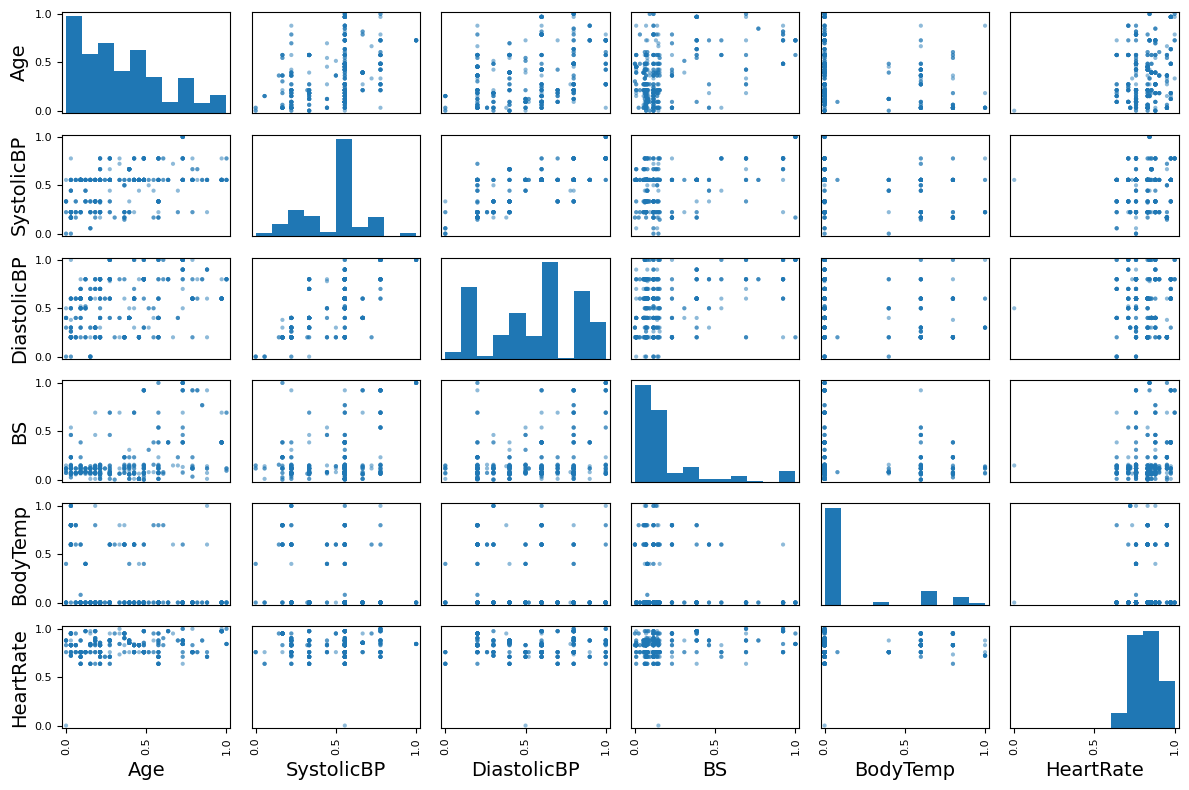

In [30]:
#SCATERR for Standatizion is the SAME !!
scatter_matrix(X_train1, figsize=(12, 8))
save_fig("scatter_matrix_plot")




In [31]:
from sklearn.metrics import mean_squared_error

pergant_predictions = tree_reg.predict(X_train)
pergant_tree_mse = mean_squared_error(y_train, pergant_predictions)
tree_rmse = np.sqrt(pergant_tree_mse)

print(tree_rmse)

0.2658871529033341


In [32]:
#GRID SEARCH

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 100], 'max_features': [2, 4, 6, ]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
    grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [34]:
#BEST PARAMETRS IN GRID SEARCH FOR RANDOM TREE
from sklearn.ensemble import RandomForestRegressor


forest_random = RandomForestRegressor(max_features=2,n_estimators=10, random_state=42)
forest_random.fit(X_train,y_train)
print("Правильность на тестовом наборе: {:.2f}".format(forest_random.score(X_test, y_test)))
forest_randomS = RandomForestRegressor(n_estimators=100, random_state=42)
print("Правильность обучающем наборе: {:.2f}".format(forest_random.score(X_train, y_train)))
forest_randomS.fit(X_train1,y_train)
print("Правильность на тестовом STanda наборе: {:.2f}".format(forest_randomS.score(X_test, y_test)))
#frRS= forest_randomS.score(X_test, y_test)
#print('accurasssusi=', frRS )


Правильность на тестовом наборе: 0.65
Правильность обучающем наборе: 0.85
Правильность на тестовом STanda наборе: -1.65


In [35]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
#'Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate'

array([0.17911698, 0.19906478, 0.14103449, 0.3559712 , 0.04798638,
       0.07682618])

In [36]:
#RANDOM FOREST CLASSIFER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_train, y_train)

print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))
print("Правильность обучающем наборе: {:.2f}".format(clf.score(X_train, y_train)))

Правильность на тестовом наборе: 0.82
Правильность обучающем наборе: 0.94


In [37]:
pergant_data.head()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0.0
1,35,140,90,13.0,98.0,70,0.0
2,29,90,70,8.0,100.0,80,0.0
3,30,140,85,7.0,98.0,70,0.0
4,35,120,60,6.1,98.0,76,1.0


In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")



array([0.8173913 , 0.83333333, 0.85964912, 0.77192982, 0.83333333])

In [39]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)


In [40]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[131   6  11]
 [  4 187  35]
 [  9  35 153]]


In [41]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


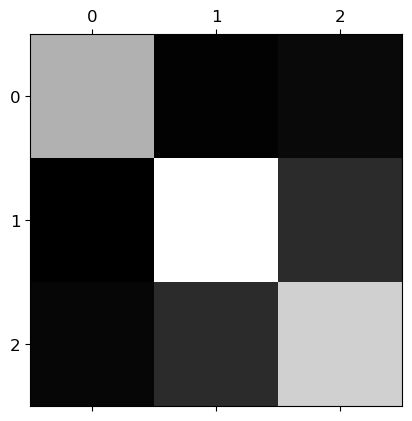

In [42]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [43]:
print ('version for git')

version for git


In [44]:
print(f"There are {pergant_data1.duplicated().sum()} duplicates data")
pergant_data1.loc[pergant_data1.duplicated(keep=False)].sort_values(by=pergant_data1.columns.to_list())

There are 431 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
535,16,70,50,7.5,100.0,70,1.0
928,16,70,50,7.5,100.0,70,1.0
80,16,90,65,6.9,98.0,76,2.0
343,16,90,65,6.9,98.0,76,2.0
761,16,90,65,6.9,98.0,76,2.0
...,...,...,...,...,...,...,...
932,49,120,90,7.5,98.0,77,1.0
586,49,120,90,7.5,98.0,77,2.0
825,49,120,90,7.5,98.0,77,2.0
121,49,140,90,15.0,98.0,90,0.0


In [45]:
enddata = pergant_data1.drop_duplicates(keep=False)

In [46]:
enddata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          100 non-null    int64  
 1   SystolicBP   100 non-null    int64  
 2   DiastolicBP  100 non-null    int64  
 3   BS           100 non-null    float64
 4   BodyTemp     100 non-null    float64
 5   HeartRate    100 non-null    int64  
 6   RiskLevel    100 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 6.2 KB


In [47]:
pergant_D = enddata[['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']] 
pergant_L = enddata['RiskLevel']
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

X_trainE, X_testE, y_trainE, y_testE = train_test_split(pergant_D, pergant_L, random_state=42)
knnE = KNeighborsClassifier(n_neighbors=1)

In [48]:
knnE.fit(X_trainE, y_trainE)
#print("Прогнозы на тестовом наборе: {}".format(knn.predict(X_test)))

print("Правильность на обучающем  наборе: {:.2f}".format(knnE.score(X_trainE, y_trainE)))
print("Правильность на тестовом наборе: {:.2f}".format(knnE.score(X_testE, y_testE)))

Правильность на обучающем  наборе: 0.97
Правильность на тестовом наборе: 0.72


C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\secr_de\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee